| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./1_Introduccion_a_la_Ciencia_de_Datos.ipynb)| [⏩](./3_Analisis_Estadistico.ipynb)|

# **2. Manipulación de Datos**

## **Manipulación de Datos con Pandas**

### **Filtrado, agrupación y transformación de datos**

Para ilustrar el filtrado, agrupación y transformación de datos con Pandas, crearemos un DataFrame con datos ficticios y luego realizaremos ejemplos detallados.

**Crear un DataFrame:**

In [1]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
data = {'Nombre': ['Juan', 'María', 'Ana', 'Pedro', 'Elena'],
        'Edad': [25, 30, 22, 35, 28],
        'Género': ['M', 'F', 'F', 'M', 'F'],
        'Puntuación': [80, 90, 75, 85, 88]}

df = pd.DataFrame(data)
print("DataFrame Original:")
print(df)

DataFrame Original:
  Nombre  Edad Género  Puntuación
0   Juan    25      M          80
1  María    30      F          90
2    Ana    22      F          75
3  Pedro    35      M          85
4  Elena    28      F          88


**Filtrado de Datos:**

**Filtrar por Condición:**

In [2]:
# Filtrar por personas mayores de 25 años
filtro_edad = df['Edad'] > 25
personas_mayores = df[filtro_edad]

print("\nPersonas mayores de 25 años:")
print(personas_mayores)


Personas mayores de 25 años:
  Nombre  Edad Género  Puntuación
1  María    30      F          90
3  Pedro    35      M          85
4  Elena    28      F          88


**Filtrar por Múltiples Condiciones:**

In [3]:
# Filtrar por mujeres con puntuación mayor a 85
filtro_mujeres = df['Género'] == 'F'
filtro_puntuacion = df['Puntuación'] > 85
mujeres_puntuacion_alta = df[filtro_mujeres & filtro_puntuacion]

print("\nMujeres con puntuación mayor a 85:")
print(mujeres_puntuacion_alta)


Mujeres con puntuación mayor a 85:
  Nombre  Edad Género  Puntuación
1  María    30      F          90
4  Elena    28      F          88


**Agrupación de Datos:**

**Agrupar por una Columna y Calcular Estadísticas:**

In [4]:
# Agrupar por género y calcular la media de la puntuación
grupo_genero = df.groupby('Género')
media_puntuacion_por_genero = grupo_genero['Puntuación'].mean()

print("\nMedia de Puntuación por Género:")
print(media_puntuacion_por_genero)


Media de Puntuación por Género:
Género
F    84.333333
M    82.500000
Name: Puntuación, dtype: float64


**Transformación de Datos:**

**Aplicar una Función a una Columna:**

In [5]:
# Aplicar una función que incrementa la puntuación en 5 a los mayores de 30 años
def incrementar_puntuacion(edad, puntuacion):
    if edad > 30:
        return puntuacion + 5
    else:
        return puntuacion

df['Puntuación Incrementada'] = df.apply(lambda row: incrementar_puntuacion(row['Edad'], row['Puntuación']), axis=1)

print("\nDataFrame con Puntuación Incrementada:")
print(df)


DataFrame con Puntuación Incrementada:
  Nombre  Edad Género  Puntuación  Puntuación Incrementada
0   Juan    25      M          80                       80
1  María    30      F          90                       90
2    Ana    22      F          75                       75
3  Pedro    35      M          85                       90
4  Elena    28      F          88                       88


Estos ejemplos muestran cómo filtrar datos según condiciones, agrupar datos por una columna y realizar cálculos estadísticos, y transformar datos aplicando funciones a columnas específicas. Estas operaciones son esenciales en el análisis y manipulación de datos en Ciencia de Datos.

### **Manejo de datos faltantes**

El manejo de datos faltantes, también conocidos como valores nulos o NaN (Not a Number), es una parte crucial en el proceso de limpieza y preparación de datos. A continuación, te mostraré cómo crear un DataFrame con datos faltantes y cómo abordarlos utilizando Pandas.

**Crear un DataFrame con Datos Faltantes:**

In [6]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos faltantes
data = {'Nombre': ['Juan', 'María', 'Ana', np.nan, 'Elena'],
        'Edad': [25, np.nan, 22, 35, 28],
        'Género': ['M', 'F', np.nan, 'M', 'F'],
        'Puntuación': [80, 90, 75, np.nan, 88]}

df = pd.DataFrame(data)
print("DataFrame Original con Datos Faltantes:")
print(df)

DataFrame Original con Datos Faltantes:
  Nombre  Edad Género  Puntuación
0   Juan  25.0      M        80.0
1  María   NaN      F        90.0
2    Ana  22.0    NaN        75.0
3    NaN  35.0      M         NaN
4  Elena  28.0      F        88.0


**Identificar y Manejar Datos Faltantes:**

**Identificar Datos Faltantes:**

In [7]:
# Identificar datos faltantes por columna
faltantes_por_columna = df.isnull().sum()

print("\nDatos Faltantes por Columna:")
print(faltantes_por_columna)


Datos Faltantes por Columna:
Nombre        1
Edad          1
Género        1
Puntuación    1
dtype: int64


**Eliminar Filas con Datos Faltantes:**

In [8]:
# Eliminar filas con al menos un dato faltante
df_sin_faltantes_filas = df.dropna()

print("\nDataFrame sin Filas con Datos Faltantes:")
print(df_sin_faltantes_filas)


DataFrame sin Filas con Datos Faltantes:
  Nombre  Edad Género  Puntuación
0   Juan  25.0      M        80.0
4  Elena  28.0      F        88.0


**Imputar (Llenar) Datos Faltantes:**

In [9]:
# Imputar la edad faltante con la media de las edades
media_edad = df['Edad'].mean()
df_imputado = df.copy()
df_imputado['Edad'].fillna(media_edad, inplace=True)

print("\nDataFrame con Datos Imputados:")
print(df_imputado)


DataFrame con Datos Imputados:
  Nombre  Edad Género  Puntuación
0   Juan  25.0      M        80.0
1  María  27.5      F        90.0
2    Ana  22.0    NaN        75.0
3    NaN  35.0      M         NaN
4  Elena  28.0      F        88.0


**Rellenar con un Valor Específico:**

In [10]:
# Rellenar los datos faltantes en la columna 'Género' con 'No Especificado'
df_rellenado = df.copy()
df_rellenado['Género'].fillna('No Especificado', inplace=True)

print("\nDataFrame con Datos Rellenados:")
print(df_rellenado)


DataFrame con Datos Rellenados:
  Nombre  Edad           Género  Puntuación
0   Juan  25.0                M        80.0
1  María   NaN                F        90.0
2    Ana  22.0  No Especificado        75.0
3    NaN  35.0                M         NaN
4  Elena  28.0                F        88.0


Estos ejemplos muestran cómo identificar y manejar datos faltantes en un DataFrame. Puedes elegir entre eliminar filas con datos faltantes, imputar valores utilizando la media u otros métodos, o rellenar con un valor específico según el contexto de tus datos y los requisitos de tu análisis.

## **Operaciones Avanzadas con NumPy y Pandas**

### **Operaciones vectorizadas**

Las operaciones vectorizadas son una característica clave de bibliotecas como NumPy en Python. Permiten realizar operaciones en matrices o arrays completos de manera eficiente, sin la necesidad de escribir bucles explícitos. Esto mejora la velocidad y la claridad del código. Vamos a explorar algunas operaciones vectorizadas en NumPy con ejemplos y gráficos.

**Ejemplos de Operaciones Vectorizadas:**

**1. Suma de Dos Arrays:**

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Crear dos arrays
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

# Operación vectorizada: suma
suma_vectorizada = a + b

# Mostrar los resultados
print("Array A:", a)
print("Array B:", b)
print("Resultado de la Suma Vectorizada:", suma_vectorizada)

Array A: [1 2 3 4 5]
Array B: [5 4 3 2 1]
Resultado de la Suma Vectorizada: [6 6 6 6 6]


**2. Producto Escalar:**

In [12]:
# Crear dos arrays
c = np.array([1, 2, 3])
d = np.array([4, 5, 6])

# Operación vectorizada: producto escalar
producto_escalar = np.dot(c, d)

# Mostrar los resultados
print("\nArray C:", c)
print("Array D:", d)
print("Resultado del Producto Escalar:", producto_escalar)


Array C: [1 2 3]
Array D: [4 5 6]
Resultado del Producto Escalar: 32


**3. Funciones Matemáticas:**

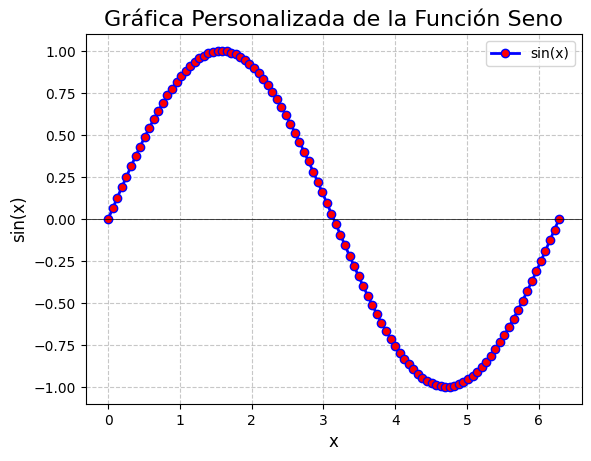

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un array
x = np.linspace(0, 2 * np.pi, 100)

# Operación vectorizada: calcular el seno
y = np.sin(x)

# Personalización de la gráfica
plt.plot(x, y, label='sin(x)', color='blue', linestyle='-', linewidth=2, marker='o', markersize=6, markerfacecolor='red')

# Agregar una línea horizontal en y=0
plt.axhline(0, color='black',linewidth=0.5)

# Agregar una leyenda
plt.legend()

# Títulos y etiquetas de los ejes
plt.title("Gráfica Personalizada de la Función Seno", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("sin(x)", fontsize=12)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

**Beneficios de las Operaciones Vectorizadas:**

1. **Claridad del Código:**
   - Las operaciones vectorizadas permiten expresar operaciones de manera más concisa y legible.

2. **Eficiencia:**
   - NumPy implementa operaciones vectorizadas en código C o Fortran subyacente, lo que mejora significativamente la velocidad de ejecución.

3. **Compatibilidad con Broadcasting:**
   - NumPy utiliza el broadcasting para extender automáticamente las dimensiones de los arrays, facilitando operaciones entre arrays de diferentes formas.

4. **Menos Necesidad de Bucles:**
   - Reducción de la necesidad de bucles explícitos, lo que simplifica el código y mejora la eficiencia.

Las operaciones vectorizadas son esenciales para el cómputo numérico eficiente y son una de las razones por las que NumPy es ampliamente utilizado en el ámbito de la ciencia de datos y la computación científica en Python.

### **Merging y concatenación de datos**

La concatenación y el merging son operaciones fundamentales en el manejo de datos, especialmente cuando trabajas con conjuntos de datos distribuidos o necesitas combinar información de diferentes fuentes. Vamos a explorar ambos conceptos con ejemplos detallados y gráficos.

**Concatenación de Datos:**

La concatenación se refiere a la operación de unir dos o más conjuntos de datos a lo largo de un eje.

**Ejemplo de Concatenación Vertical:**

In [14]:
import pandas as pd

# Crear dos DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']},
                   index=[0, 1, 2])

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5']},
                   index=[3, 4, 5])

# Concatenar verticalmente (por filas)
df_concat_vertical = pd.concat([df1, df2])

print("DataFrame 1:")
print(df1)

print("\nDataFrame 2:")
print(df2)

print("\nResultado de la Concatenación Vertical:")
print(df_concat_vertical)

DataFrame 1:
    A   B
0  A0  B0
1  A1  B1
2  A2  B2

DataFrame 2:
    A   B
3  A3  B3
4  A4  B4
5  A5  B5

Resultado de la Concatenación Vertical:
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
5  A5  B5


**Ejemplo de Concatenación Horizontal:**

In [15]:
# Crear dos DataFrames
df3 = pd.DataFrame({'C': ['C0', 'C1', 'C2'],
                    'D': ['D0', 'D1', 'D2']},
                   index=[0, 1, 2])

df4 = pd.DataFrame({'C': ['C3', 'C4', 'C5'],
                    'D': ['D3', 'D4', 'D5']},
                   index=[3, 4, 5])

# Concatenar horizontalmente (por columnas)
df_concat_horizontal = pd.concat([df1, df3], axis=1)

print("DataFrame 3:")
print(df3)

print("\nDataFrame 4:")
print(df4)

print("\nResultado de la Concatenación Horizontal:")
print(df_concat_horizontal)

DataFrame 3:
    C   D
0  C0  D0
1  C1  D1
2  C2  D2

DataFrame 4:
    C   D
3  C3  D3
4  C4  D4
5  C5  D5

Resultado de la Concatenación Horizontal:
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2


**Merging de Datos:**

El merging implica combinar conjuntos de datos basándose en claves o columnas comunes.

**Ejemplo de Merging:**

In [16]:
# Crear dos DataFrames con claves
df_left = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                        'value_left': ['L0', 'L1', 'L2']})

df_right = pd.DataFrame({'key': ['K1', 'K2', 'K3'],
                         'value_right': ['R1', 'R2', 'R3']})

# Realizar un merging basado en la columna 'key'
df_merged = pd.merge(df_left, df_right, on='key', how='inner')

print("DataFrame Izquierdo:")
print(df_left)

print("\nDataFrame Derecho:")
print(df_right)

print("\nResultado del Merging:")
print(df_merged)

DataFrame Izquierdo:
  key value_left
0  K0         L0
1  K1         L1
2  K2         L2

DataFrame Derecho:
  key value_right
0  K1          R1
1  K2          R2
2  K3          R3

Resultado del Merging:
  key value_left value_right
0  K1         L1          R1
1  K2         L2          R2


| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./1_Introduccion_a_la_Ciencia_de_Datos.ipynb)| [⏩](./3_Analisis_Estadistico.ipynb)|